# Clustering Clientes

###### Notebook por Alfredo Pasmiño

## Secciones

<a href='#problema'>1. Problema</a><br/>
<a href='#librerias'>2. Librerías</a><br/>
<a href='#analisis'>3. Análisis exploratorio</a><br/>
<a href='#cluster'>4. Elección número de cluster</a><br/>
<a href='#kmean'>5. K Means</a><br/>
<a href='#fuzzy'>6. Fuzzy c-Means</a><br/>
<a href='#conclusion'>7. Conclusión</a>

<a id='problema'></a>
## 1. Problema

En SKC existe la problematica de como segmentar clientes para establecer una mejor política de asignación de descuentos, promociones especiales, disminuir las diferentes listas de precios por clientes agrupando cuales de ellos son más parecidos, etc. tratando de resolver esta problematica se abordará el problema utilizando dos métodos Kmeans y Fuzzy cmeans, veremos que resultados nos entregan.

<a id='librerias'></a>
## 2. Librerías

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import *
import seaborn as sns
from sklearn import preprocessing
import pylab as pl
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
import skfuzzy as fuzz

<a id='analisis'></a>
## 3. Análisis exploratorio

In [2]:
ruta='C:/Users/alfredo/Documents/Diplomado/'

In [30]:
df=pd.read_csv(ruta+'cluster.txt', decimal=',', encoding = 'ISO-8859-1', sep='\t')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 4 columns):
customer     1534 non-null object
venta        1534 non-null float64
potencial    1534 non-null float64
margen       1534 non-null float64
dtypes: float64(3), object(1)
memory usage: 48.0+ KB


In [31]:
#modifico el formato de los ingresos y costos
df[['venta', 'potencial', 'margen']] = df[['venta', 'potencial', 
                                           'margen']].apply(lambda x: x.astype(np.int64))

In [32]:
#transformo la fecha a formato date
df.head()

,customer,venta,potencial,margen
0,Soc Punta Del Cobre S.A.,1367792,2979587,630176
1,Transportes Saver Ltda,708504,1149691,276099
2,SKC Rental S.A.,393871,2521855,92096
3,Pedro Y Nelson Prado Paez Ltda.,510187,373243,188493
4,S.C.M. Atacama Kozan,84956,262118,46424


In [33]:
#imprimimos los estadísticos básicos
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['venta', 'potencial', 'margen']].describe()

,venta,potencial,margen
count,1534.00,1534.00,1534.00
mean,10079.59,22478.88,4746.33
std,54690.48,120464.14,24339.62
min,-1603.00,1001.00,-1072.00
25%,206.00,1535.00,98.00
50%,880.00,3138.50,460.50
75%,3534.50,11157.25,1743.75
max,1367792.00,2979587.00,630176.00


Tenemos 1534 clientes con tres variables, la venta que son los ingresos generados. El potencial es un cálculo que estima cual es el máximo en ingresos que puedo generar por equipo, estimador que entrega el fabricante basado en el modelo del equipo y el período de uso. el margen es simplemente la venta - costo de venta.
La información corresponde al año 2015 donde el promedio de venta fue de 10.079,6 USD, el percentil 50 fue de 880 USD y el máximo fue de 1.367.792 USD, se puede apreciar que la desviación estandar es de 54.690 USD interpretando la gran diferencia entre el percentil 50 y el máximo.

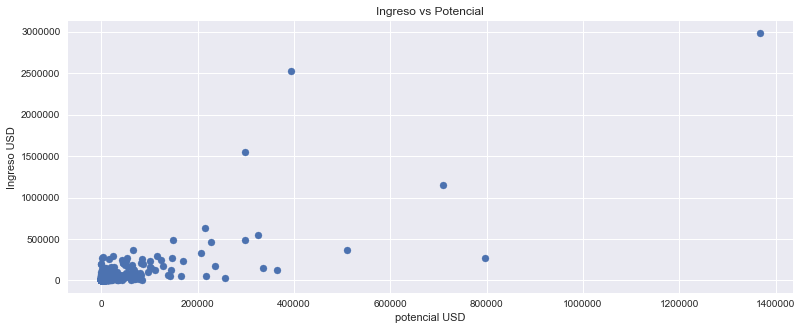

In [36]:
#graficamos el ingreso mensual vs potencial
%matplotlib inline
sns.set()

matplotlib.rcParams['figure.figsize'] = (13, 5)
plt.title('Ingreso vs Potencial')
plt.ylabel('Ingreso USD')
plt.xlabel('potencial USD')
N = len(df.venta)
colors = np.random.rand(N)
#area=np.sqrt(df.margen)
plt.scatter(df['venta'], df['potencial'])
plt.show()

Graficando la venta y el potencial se puede apreciar como estan distribuidos los datos y como efectivamente hay clientes que sobresalen del resto, debido principalmente a que tienen una gran flota de equipos.

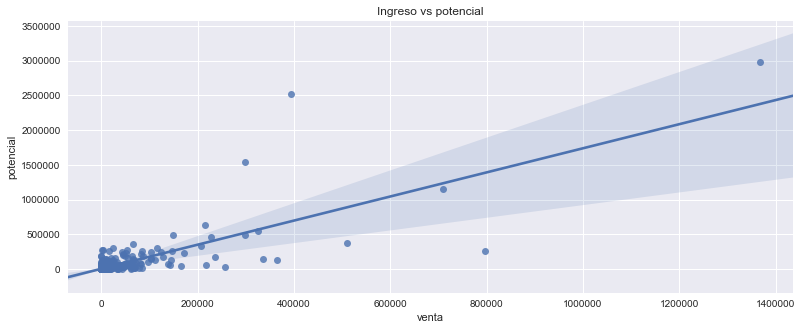

In [37]:
#Gráfico ingreso vs margen
plt.figsize = (13, 5)
plt.title('Ingreso vs potencial')
sns.regplot(x='venta', y='potencial', data=df)
plt.show()

Se puede visualizar que en el gráfico ingreso vs potencial que existe una relación lineal entre los ingresos y el potencial que efectivamente debe ser así ya que a mayor número de equipos mayor potencial y teóricamente mayores ingresos.

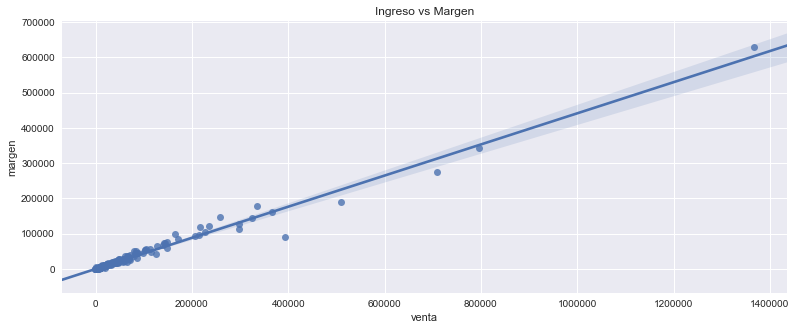

In [39]:
#Gráfico ingreso vs margen
plt.figsize = (13, 5)
plt.title('Ingreso vs Margen')
sns.regplot(x='venta', y='margen', data=df)
plt.show()

Se puede visualizar en el gráfico ingreso vs margen que existe una relación mucho mas notoria entre estas dos variables, por lo que para el análisis omitiremos la variable margen.

<a id='cluster'></a>
## 4. Elección número de cluster

A continuación seleccionaremos el número de cluster.

In [48]:
#normalizamos los datos

min_max_scaler = preprocessing.MinMaxScaler()
df_normalizado = min_max_scaler.fit_transform(df[['venta', 'potencial', 'margen']])
x = pd.DataFrame(df_normalizado)

Para seleccionar el número de cluster utilizaremos el método del codo, utilizaremos un un rango de 20 clusters y calcularemos la inercia siendo esta la suma de las distancias al cuadrado de cada objeto del Cluster a su correspondiente centroide.

In [12]:
#cálculo de kmeans, centroide, distancia entre un rango de n cluster

rango = range(1,20)
kmeans = [KMeans(n_clusters=i).fit(x) for i in rango]
centroide = [i.cluster_centers_ for i in kmeans]

dk = [cdist(x, cent, 'euclidean') for cent in centroide]
cIdx = [np.argmin(D,axis=1) for D in dk]
dist = [np.min(D,axis=1) for D in dk]
avgWithinSS = [sum(d)/x.shape[0] for d in dist]

# Total suma cuadrado intra clase
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(x)**2)/x.shape[0]
bss = tss-wcss

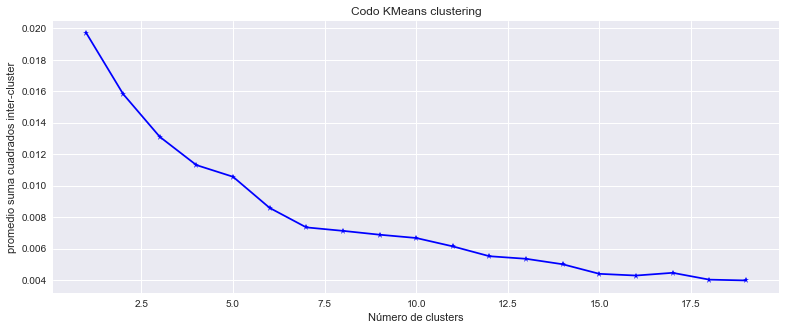

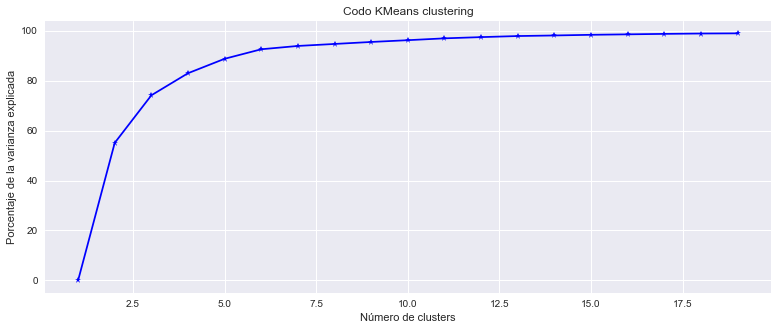

In [42]:
#gráfico n cluster

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rango, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Número de clusters')
plt.ylabel('promedio suma cuadrados inter-cluster')
plt.title('Codo KMeans clustering')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rango, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Número de clusters')
plt.ylabel('Porcentaje de la varianza explicada')
plt.title('Codo KMeans clustering')
plt.show()

Los gráficos de arriba corresponde el primero a la inercia y como se comporta al efectuar 20 clusuters y el segundo al porcentaje de la varianza entre el mismo rango de n cluster, la idea es seleccionar la menor cantidad de clusters pero que a su vez tener la menor inercia y que el porcentaje de la varianza también sea lo más pequeño al desplazarse de rango.
El códo despues del quinto cluster forma una leve inclinación que después del sexto cluster cada vez decae másy la suma cuadrada de la distancia es mucho menor, al revisar el porcentaje de la varianza esta cada vez es menor desde el sexto cluster por lo que utilizaremos 6 cluster.

<a id='kmean'></a>
## 5. K Means

Implementaremos kmeans con 6 clusters

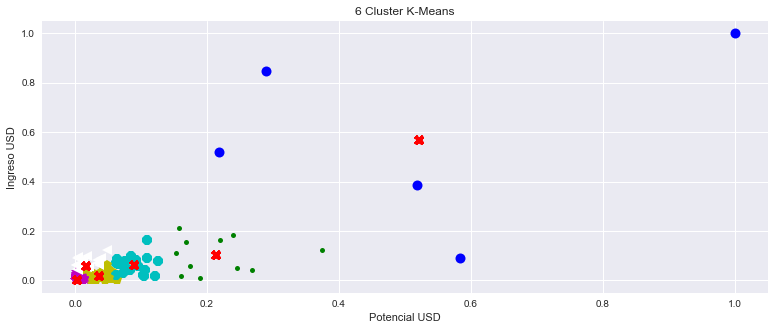

In [63]:
#implementamos kmeans con el número de cluster seleccionados

kmeans=KMeans(n_clusters=6, init='random', n_init=10, max_iter=300, random_state=0)
kmeansoutput=kmeans.fit(x)
centros = np.array(kmeansoutput.cluster_centers_)

colors = ['b', 'g', 'c', 'm', 'y', 'w']
markers = ['o', '.', '8', '*', 'p', '<']

for i, l in enumerate(kmeansoutput.labels_):
    plt.plot(x.iloc[:,0][i], x.iloc[:,1][i],color=colors[l], marker=markers[l], markersize=10, ls='None')
      
for i in enumerate(kmeansoutput.cluster_centers_):    
    plt.plot(centros[:,0], centros[:,1], 'rX', markersize=10)
    
plt.xlabel('Potencial USD')
plt.ylabel('Ingreso USD')
plt.title('6 Cluster K-Means')
plt.show()

En el gráfico se puede apreciar que los centroides son las cruces rojas y los 6 cluster formados son los otros puntos, quedan agrupados especialmente los clientes con un gran parque de equipos frente a los otros clientes que estan mucho más juntos en este caso su forma y color los distingue en que categoría quedan.

In [51]:
#función resumen clientes en cluster

def print_results(centroids, num_cluster_points):
       
    print ('\n\nResultado final:')
    for i, c in enumerate(centroids):
        print ('\tCluster %d' % (i + 1))
        print ('\t\tNumero clientes en el Cluster: %d' % num_cluster_points.count(i))
        print ('\t\tCentroide: %s' % str(centroids[i]))

In [64]:
#mostramos los cluster y cuantos clientes tiene cada uno

print_results(kmeansoutput.cluster_centers_, kmeansoutput.labels_.tolist())



Resultado final:
	Cluster 1
		Numero clientes en el Cluster: 5
		Centroide: [ 0.52177246  0.56800079  0.46669677]
	Cluster 2
		Numero clientes en el Cluster: 11
		Centroide: [ 0.21329512  0.10319146  0.21412172]
	Cluster 3
		Numero clientes en el Cluster: 19
		Centroide: [ 0.08877063  0.06214289  0.09701992]
	Cluster 4
		Numero clientes en el Cluster: 1414
		Centroide: [ 0.00280076  0.00222226  0.00350674]
	Cluster 5
		Numero clientes en el Cluster: 55
		Centroide: [ 0.0361677   0.01799981  0.03882021]
	Cluster 6
		Numero clientes en el Cluster: 30
		Centroide: [ 0.01652075  0.05910739  0.01711071]


Los resultados para los grandes clientes quedaron perteneceientes al cluster 1 con 5 clientes y el cluster 2 con 11 clientes, el grupo de clientes medianos pertenecen al cluster 3 con 19 clientes, clusuter 6 y cluster 5 sumando 85 clientes. los clientes con menor peso al tener pocos equipos comporandolos con los otros clientes pertenecen al cluster 4 agrupando a 1414 clientes.

<a id='fuzzy'></a>
## 6. Fuzzy c-Means

A diferencia de kmeans los algoritmos de agrupamiento difuso trata de resolver el problema cuando existe una gran similitud de cada elemento en alguno de los grupos formados. Esto se logra representando la similitud entre un elemento y un grupo por una función, llamada función de pertenencia, que toma valores entre cero y uno. Los valores cercanos a uno indican una mayor similitud, mientras que los cercanos a cero indican una menor similitud.

In [79]:
#generamos el n cluster en c-means fuzzy

alldata = np.vstack((x.iloc[:, 0], x.iloc[:, 1]))
cntr, u_orig, u, fpc, _, _, _ = fuzz.cluster.cmeans(alldata, 6, 2, error=0.005, maxiter=300)

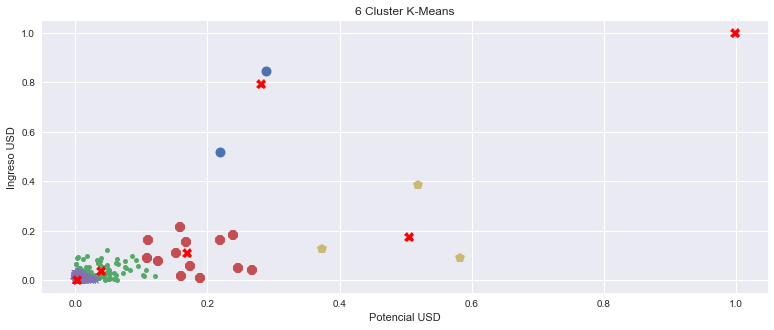

In [80]:
# gráfico fuzzy c-means

for j in range(5):
    plt.plot(alldata[0, u_orig.argmax(axis=0) == j], alldata[1, u_orig.argmax(axis=0) == j],
            marker=markers[j], markersize=10, ls='None')
    
for pt in cntr:
    plt.plot(pt[0], pt[1],  'rX', markersize=10)

plt.title('Trained model')
plt.xlabel('Potencial USD')
plt.ylabel('Ingreso USD')
plt.title('6 Cluster K-Means')
plt.show()

Se puede apreciar una diferencia entre los resultados de kmeans y fuzzy c-means revisando el gráfico la clasificación o la conformación de los cluster es diferente por ejemplo el punto mas alejado lo deja en un solo cluster y agrupa los siguientes en dos cluster comparandolo con kmeans que todos estos pertenecen al mismo grupo.

In [82]:
#mostramos los cluster y cuantos clientes tiene cada uno

label_cmeans = np.argmax(u_orig, axis=0)
print_results(cntr, label_cmeans.tolist())



Resultado final:
	Cluster 1
		Numero clientes en el Cluster: 2
		Centroide: [ 0.28155165  0.79313397]
	Cluster 2
		Numero clientes en el Cluster: 90
		Centroide: [ 0.03871643  0.03729565]
	Cluster 3
		Numero clientes en el Cluster: 13
		Centroide: [ 0.16846197  0.10893905]
	Cluster 4
		Numero clientes en el Cluster: 1425
		Centroide: [ 0.00292993  0.00211306]
	Cluster 5
		Numero clientes en el Cluster: 3
		Centroide: [ 0.50451201  0.1771439 ]
	Cluster 6
		Numero clientes en el Cluster: 1
		Centroide: [ 0.99774689  0.99785154]


Los resultados finales para los grandes clientes el cluster 6 que tiene solo 1 cliente, cluster 1 y 5 con 2 y 3 clientes respectivos y el cluster 3 con 13 clientes. El grupo de clientes medianos pertenecen al cluster 2 con 90 clientes y finalmente los clientes pequeños pertenecen al cluster 4 con 1425 cleintes.

<a id='conclusion'></a>
## 7. Conclusión

Al utilizar dos métodos diferentes como Kmeans y Fuzzy C-means nos entregaron resultados de agrupación diferentes por esto es necesario conocer el negocio para interpretar los resultados por ejemplo Fuzzy clasifica a nuestro principal cliente en un solo cluster en la práctica es correcto ya que es un cliente especial que tiene precios y descuentos especiales diferentes a cualquier cliente así como los clientes del grupo 2 que se dedican al arriendo de equipos por que que tienen un gran parque de equipos, como conclusión usaremos los resultados de Fuzzy ya que son los que mejor logran interpretar el negocio.